In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-16 09:56:28--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.34
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.1MB/s    in 2.2s    

2022-09-16 09:56:31 (13.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



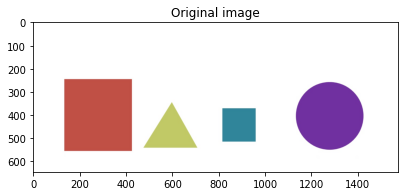

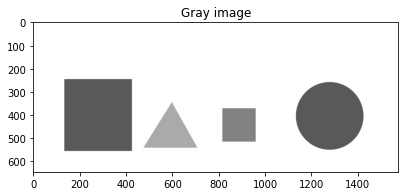

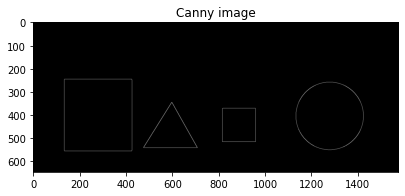

Number of contours found =  4


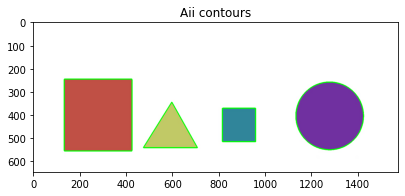

In [2]:
image = cv2.imread('/content/images/bunchofshapes.jpg')
imshow('Original image' , image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
imshow('Gray image', gray)

edged = cv2.Canny(gray,50,200)
imshow('Canny image', edged)

contours , hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Number of contours found = ', len(contours))

cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('Aii contours', image)

contour area before sorting...
[20589.5, 22900.5, 66582.5, 90220.0]
Contour Area after sorting...
[20589.5, 22900.5, 66582.5, 90220.0]


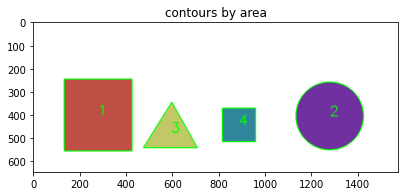

In [3]:
import enum
import cv2 
import numpy as np

#function we'll use to display contours area

def get_contours_areas(contours):
  all_areas =[]
  for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

image = cv2.imread('/content/images/bunchofshapes.jpg')

print('contour area before sorting...')
print(get_contours_areas(contours))

sorted_contours = sorted(contours, key=cv2.contourArea, reverse = True)

print('Contour Area after sorting...')
print(get_contours_areas(contours))

for (i,c) in enumerate(sorted_contours):
  M = cv2.moments(c)
  cx = int(M['m10']/ M['m00'])
  cy = int(M['m01']/ M['m00'])
  cv2.putText(image, str(i+1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
  cv2.drawContours(image, [c], -1, (0,255,0),3)

imshow('contours by area', image)

In [4]:
#define some function we'll be using

def x_cord_contour(contours):
  if cv2.contourArea(contours)>10:
    M = cv2.moments(contours)
    return (int(M['m10']/M['m00']))
  else:
    pass

def label_contour_center(image, c):
  M = cv2.moments(c)
  cx = int(M['m10']/ M['m00'])
  cy = int(M['m01']/ M['m00'])

  cv2.circle(image, (cx,cy), 10 , (0,0,255), -1)
  return image

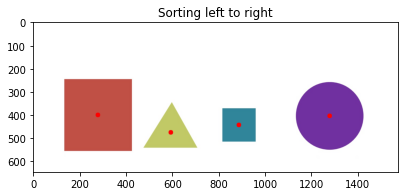

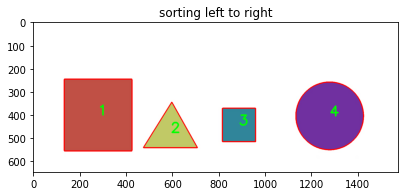

In [5]:
image = cv2.imread('/content/images/bunchofshapes.jpg')
original_image = image.copy()

for (i,c) in enumerate(contours):
  orig = label_contour_center(image, c)

imshow("Sorting left to right", image)

contours_left_to_right = sorted(contours , key = x_cord_contour, reverse=False)

for (i,c) in enumerate(contours_left_to_right):
  cv2.drawContours(original_image, [c], -1 ,(0,0,255), 3)
  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])
  cv2.putText(original_image, str(i+1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),5)
  (x,y,w,h)= cv2.boundingRect(c)

imshow('sorting left to right', original_image)

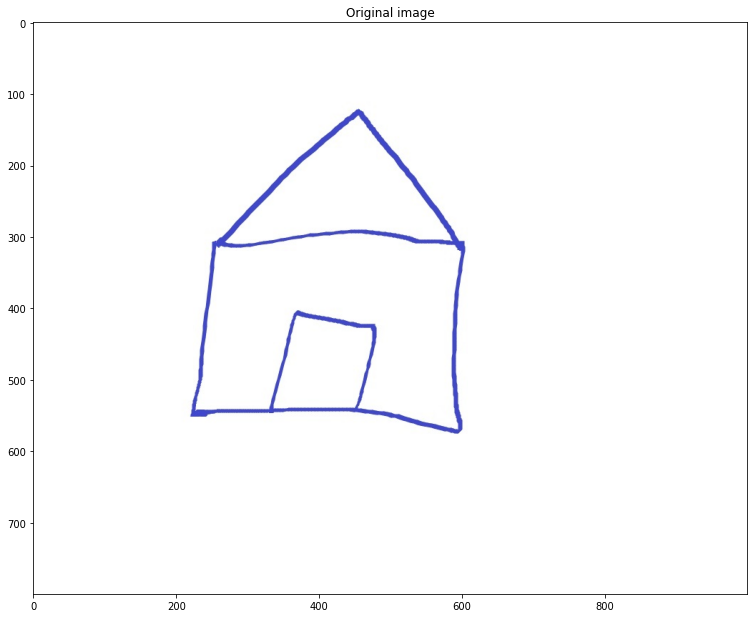

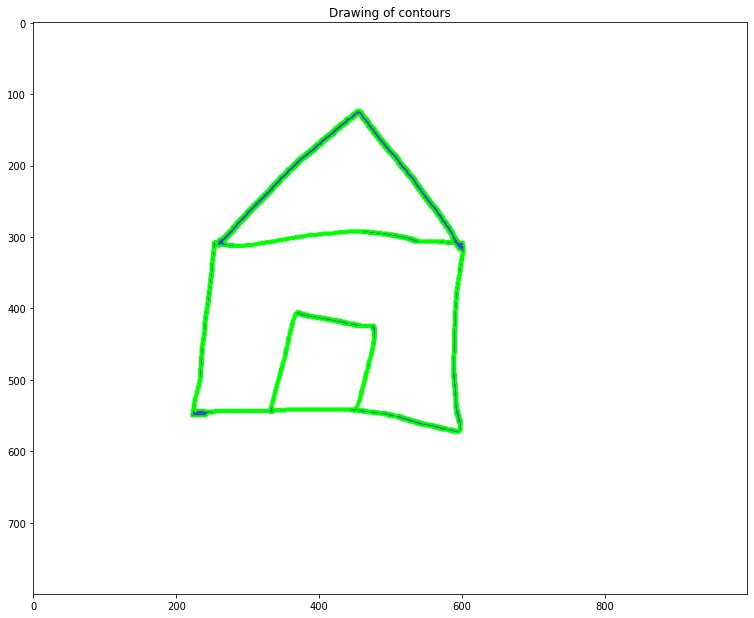

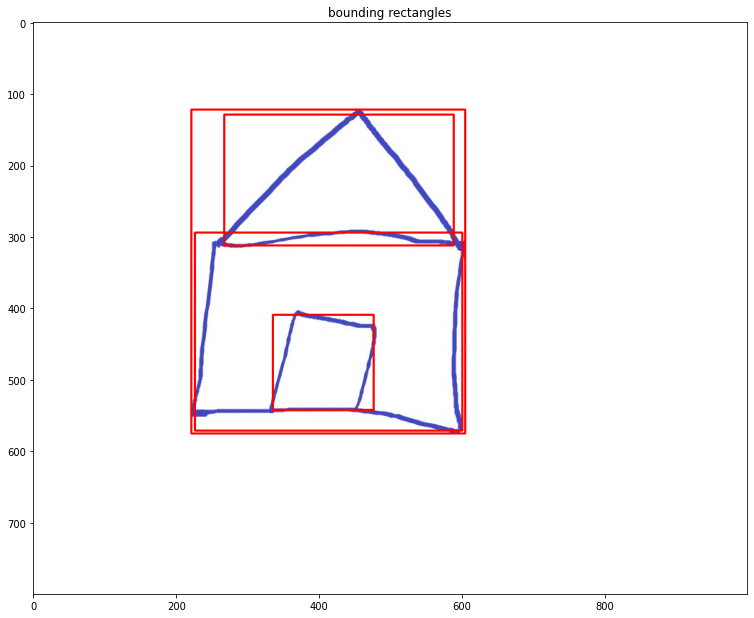

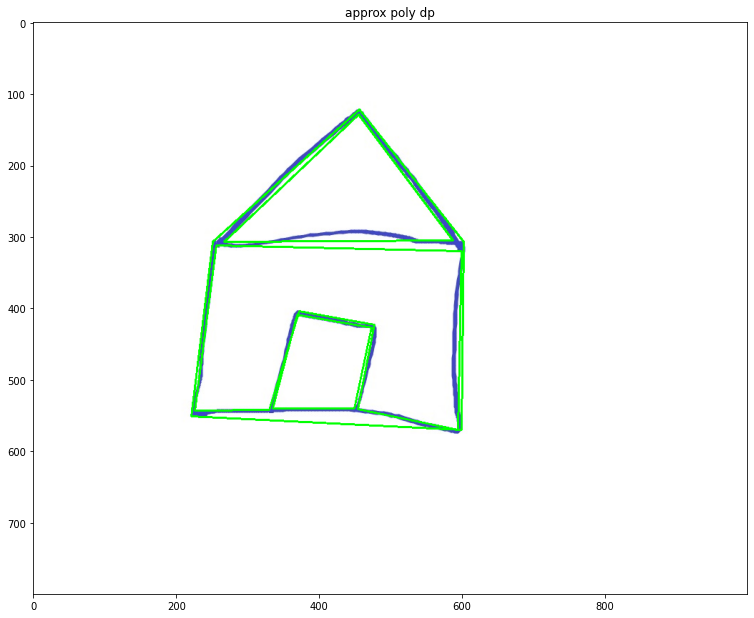

In [6]:
import cv2 
import numpy as np

image =cv2.imread('/content/images/house.jpg')
imshow('Original image', image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret , thresh = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy= image.copy()
orig_image= image.copy()

for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(orig_image, (x,y), (x+w,y+h), (0,0,255), 2)
  cv2.drawContours(image, [c], 0,(0,255,0),2)

imshow('Drawing of contours', image)
imshow('bounding rectangles', orig_image)

for c in contours:
  accuracy = 0.02 * cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, accuracy, True)
  cv2.drawContours(copy, [approx], 0, (0,255,0), 2)

imshow('approx poly dp', copy)

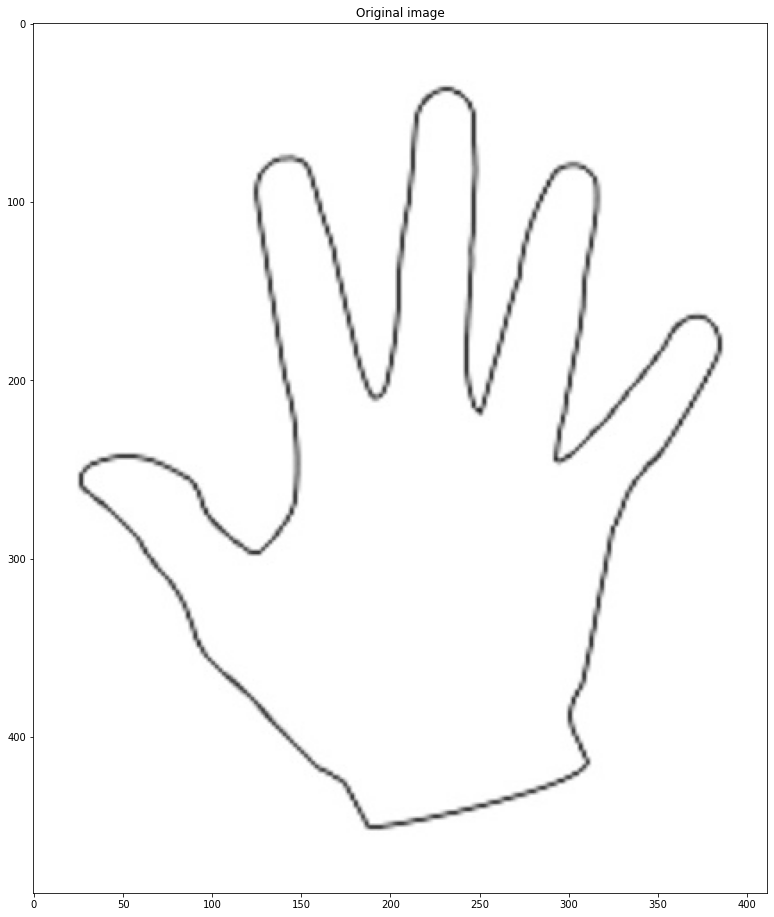

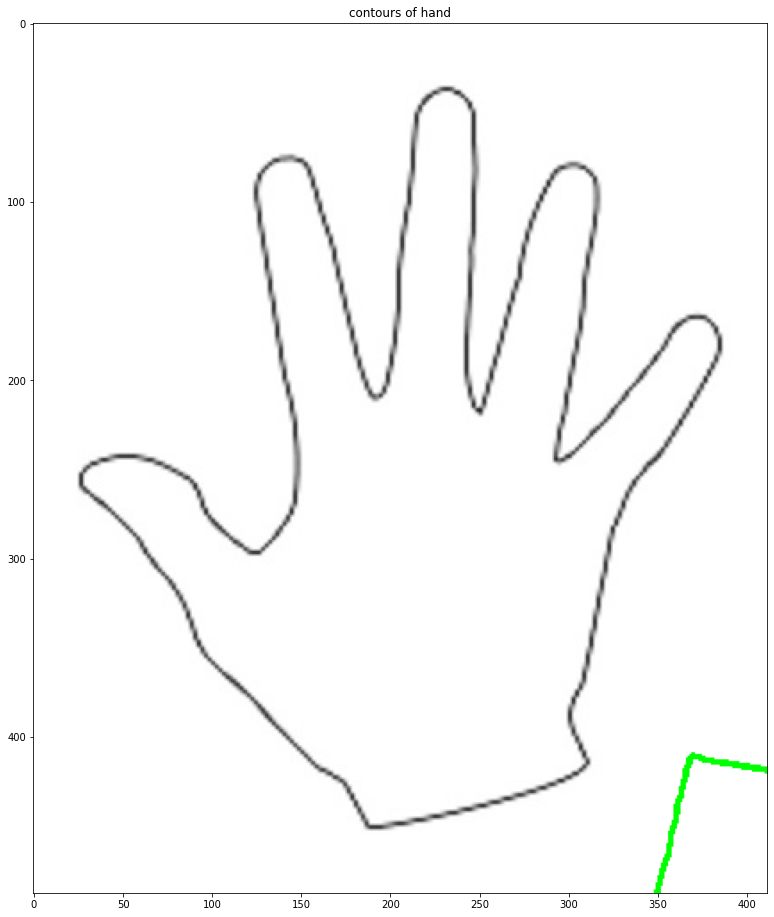

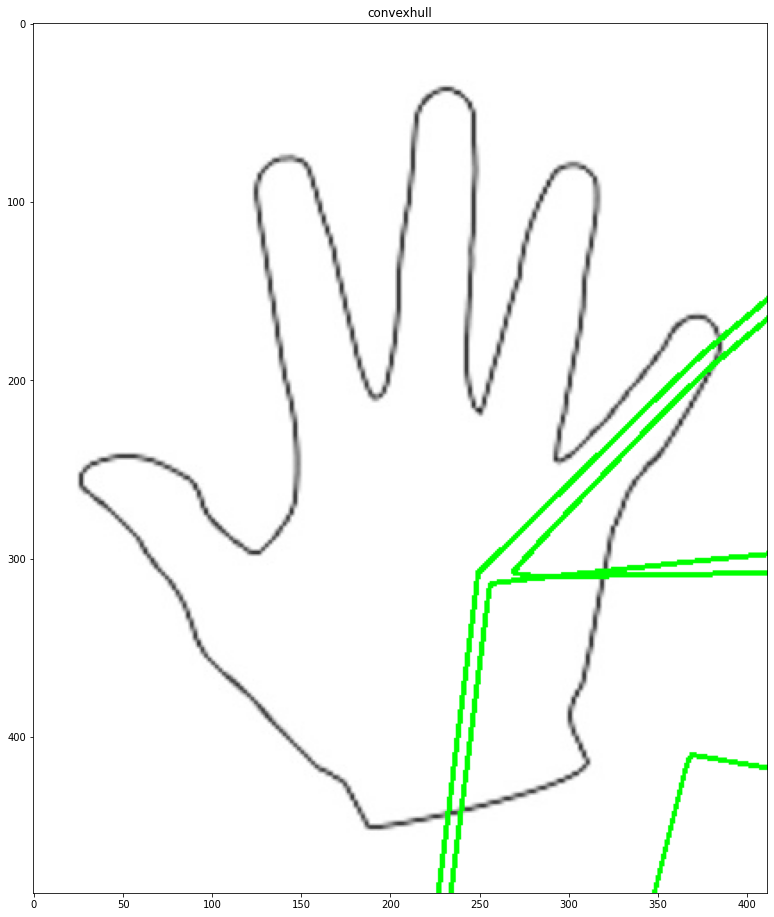

In [7]:
import numpy as np
import cv2

image = cv2.imread('/content/images/hand.jpg')
imshow('Original image', image)
original = image.copy()

ret , thresh = cv2.threshold(gray, 176,255,0)

contours , hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours ,0,(0,255,0), 2)
imshow('contours of hand', image)

n = len(contours ) -1
contours = sorted(contours, key= cv2.contourArea, reverse = False)[:n]

for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(original, [hull], 0, (0,255,0),2)

imshow('convexhull', original)

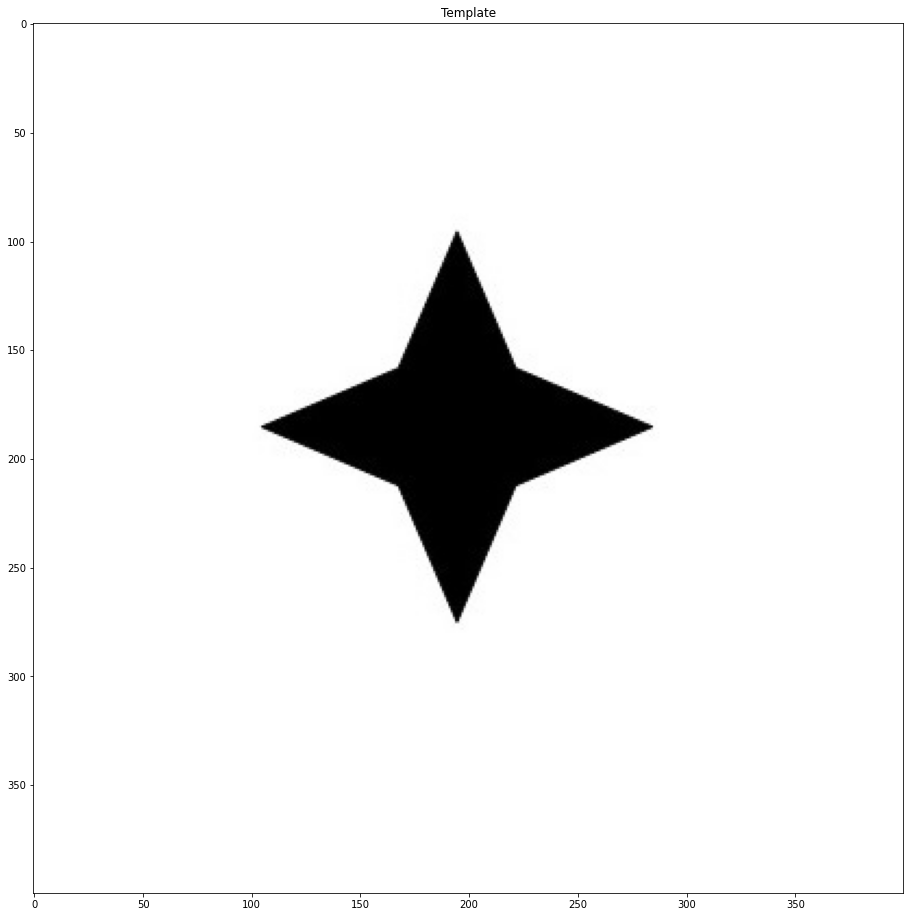

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


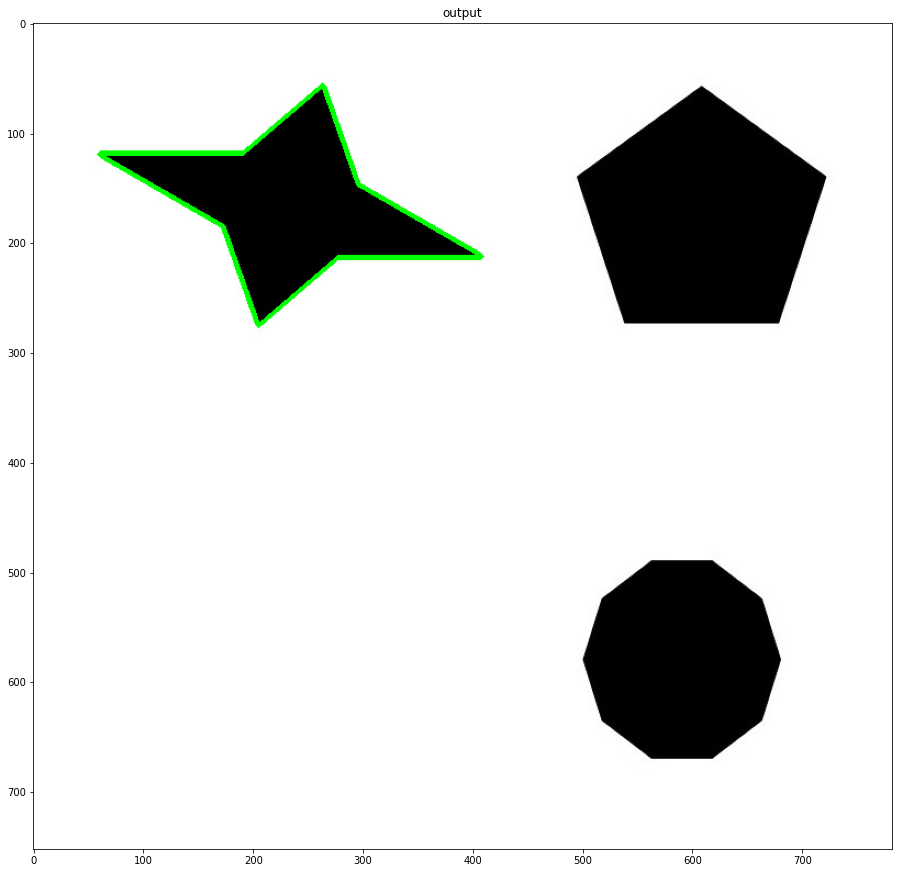

In [29]:
import cv2
import numpy as np

template = cv2.imread('/content/images/4star.jpg',0)
imshow('Template', template)

target = cv2.imread('/content/images/shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_RGB2GRAY)

ret, thresh1 = cv2.threshold(template, 127,255,0)
ret, thresh2 = cv2.threshold(target_gray, 127,255,0)

contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

template_contour = contours[1]

contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
  match = cv2.matchShapes(template_contour, c, 3, 0.0)
  print(match)
  if match < 0.15:
    closest_contour = c 
  else:
    closest_contour = []

cv2.drawContours(target, [closest_contour], -1 , (0,255,0), 3)
imshow('output', target)